In [2]:
# ANN - simple
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [3]:
clf.fit(X, y)
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [4]:
# How to see the weights at each layer
# coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.
# Below would give the weights between layer 0 and layer 1
clf.coefs_[0]
# intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.
# Below would give the bias vectors added to layer 1
clf.intercepts_[0]

array([-0.14962269,  0.75950271, -0.5472481 ,  6.92417703, -0.87510813])

In [5]:
# ANN - Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
import numpy as np
from pandas.plotting import scatter_matrix
cancer = load_breast_cancer()
cancer.keys()
cancer['data'].shape
import numpy as np
import pandas as pd

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [6]:
# use describe on dataframe
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# plot exploration
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>],
       [<Axes: title={'center': 'mean concave points'}>, <Axes: >]],
      dtype=object)

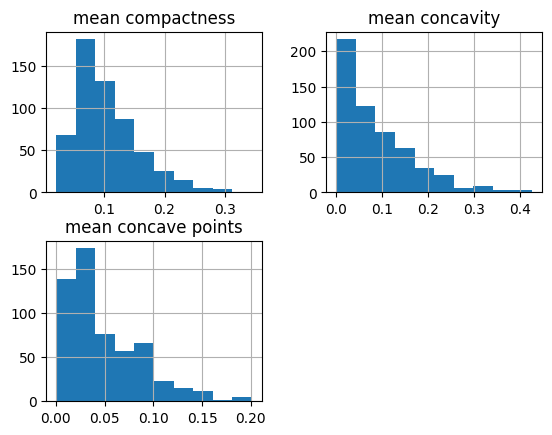

In [8]:
# histogram of some selected features
df.iloc[:, 5:8].hist()

In [9]:
# plot correlations
correlations = df.iloc[:,5:8].corr()

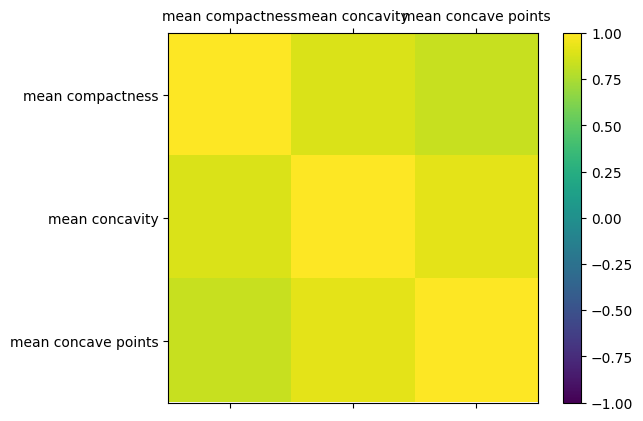

In [10]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.iloc[:, 5:8].columns)
ax.set_yticklabels(df.iloc[:, 5:8].columns)

plt.show()

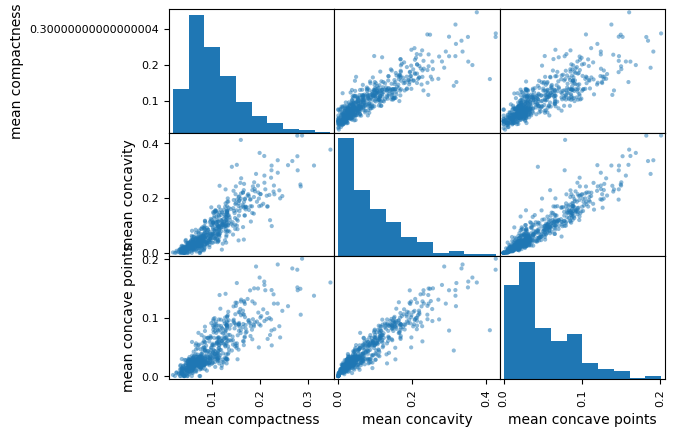

In [11]:
# scatterplot
scatter_matrix(df.iloc[:, 5:8])
plt.show()

In [12]:
# choose response and predictor variables
X = cancer['data']
y = cancer['target']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
# fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [16]:
# apply transformations to data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[50  1]
 [ 3 89]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.99      0.97      0.98        92

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

